Seja a equação de Poisson em 2D
\begin{equation*}
    \nabla^2 u = cos(2\pi x) \text{ para } \Omega
\end{equation*}
    

Formulando em um problema bem-posto com condição de contorno mista de Dirichlet e Neunann, temos as seguintes condições de contorno:
\begin{align*}
    u = 0 &\text{ para } \partial\Omega_{D}\\
    \nabla u \cdot \vec{n} =0 &\text{ para } \partial\Omega_{A, B, C}
\end{align*}

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Metodo de Jacobi

100002 1.4410178083823198e-07


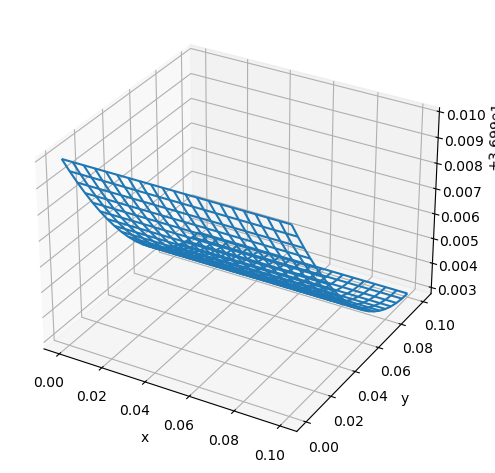

In [ ]:
h = 0.005
x = np.arange(0, 0.1+h/2, h)
y = np.arange(0, 0.1+h/2, h)

#Condicoes de Contorno
u_a = 37 #dirichlet esquerdo
u_b = 0 #dirichlet topo
u_c = 0 #dirichlet direito
u_d = 0 #neumann base

tam = len(x) #dimensão do sistema
k = 0
k_max = 100000 #numero maximo de iteraçoes do metodo
error = 1
error_max = 1e-8 #erro para convergencia

#funçao do lado direito f

f = np.zeros((tam, tam))

for i in range(tam):
    for j in range(tam):
        f[i, j] = np.cos(2*np.pi*x[i])

#vetor solução
u = np.zeros((tam, tam))
u_new = np.zeros((tam, tam))

while (k < k_max and error > error_max):
    for i in range(tam):
        for j in range(tam):
            #TODAS AS RELAÇÕES COM PONTOS FICTICIOS
            # uijp = 2*h*u_c+u[i,tam-2] if j==tam-1 else u[i,j+1]
            # uijm = 2*h*u_a+u[i,1] if j==0 else u[i,j-1]
            # uipj = 2*h*u_d+u[tam-2,j] if i==tam-1 else u[i+1,j]
            # uimj = 2*h*u_b+u[1,j] if i==0 else u[i-1,j]


            #para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
            if (i==0):
                u_new[i, j] = u_a
            else:
                #Tradando condicoes de contorno do tipo Neumann
                uijp = 2*h*u_c + u[i,tam-2] if j == tam-1 else u[i, j+1]
                # uijm = 2*h*u_a + u[i,1] if j == 0 else u[i,j-1]
                uijm = u[i, j-1]
                uipj = 2*h*u_d + u[tam-2, j] if i == tam-1 else u[i+1, j]

                uimj = 2*h*u_b + u[1, j] if i == 0 else u[i-1, j]
                u_new[i, j] = (uipj + uimj + uijp + uijm - f[i, j]*h**2)/4.0

        error = np.linalg.norm(u_new-u, np.inf)/np.linalg.norm(u_new, np.inf)
        k = k+1
        u = np.copy(u_new)

print(k, error)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(x, y, u)
plt.ylabel('y')
plt.xlabel('x')
plt.tight_layout()
plt.show()

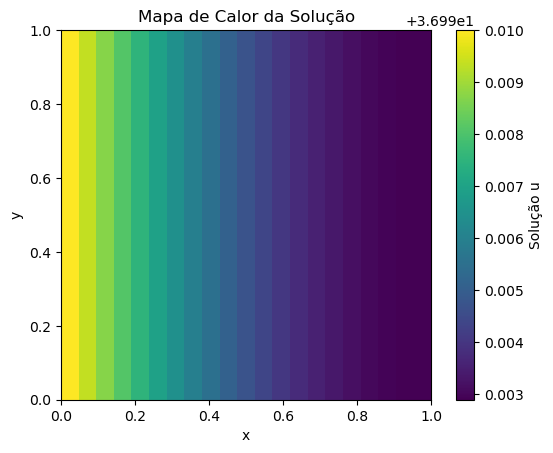

In [9]:
# Mapeamento 2D da solução
plt.figure()
plt.imshow(u.T, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(label='Solução u')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de Calor da Solução')
plt.show()